# Proyecto: Estimación de la apreciación de una acción durante su primer año de cotización en bolsa

# Storytelling: Inversión en Empresas que recién salen a Cotizar

Conforme pasan los años, conseguir retornos en inversiones en acciones que superen los rendimientos de sus competidores directos se hace más difícil. La teoría financiera indica que, acciones públicas que tengan una volatilidad parecida, variarán su precio de manera similar. Conseguir un retorno adicional entre productos financieros comparables es lo que se conoce como 'alpha'. En el contexto actual, conseguir este excedente es complejo debido a que compiten por él ejércitos de analistas que potencian sus habilidades mediante el uso de cada vez más rápidos e inteligentes algoritmos predictivos.

El interés predictivo y, por consiguiente, la mayor racionalidad de mercado, se concentra alrededor de los principales índices y compañías. Es alrededor de índices como el S&P por ejemplo, que conseguir un alpha superior al 0.5% es prácticamente imposible. Sin embargo, esto deja abierta la puerta de mercados menos conocidos donde haya menos competencia por parte de grandes entidades comercializadoras de acciones y por ende, precios menos racionales. Uno de ellos, y el que investigaremos en este documento, es el mercado de las empresas que recién salieron a cotizar tras una IPO.

El objetivo principal estará en determinar qué características de una empresa apenas finalizada su IPO son más importantes para predecir su desempeño en el mercado de valores. Esta investigación contempla más de 2000 empresas que salieron a cotizar entre 1996 y 2018, y cuyos rendimientos se analizan sobre su primer año de cotización.

El impacto de esta investigación está dirigido a personas con acceso a vehículos de inversión complejos, pero que no cuentan con el capital suficiente o los contactos para acceder a IPO's y fondos sofisticados de manejo de capitales. En otras palabras, personas que han generado una buena bolsa de ahorros, pero no la suficiente para ser considerados influyentes en el mercado.

In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import random
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [33]:
pd.set_option('display.max_columns', None)

In [34]:
df = pd.read_csv("df_main_clean4.csv", low_memory=False,encoding='unicode_escape')

## Analisis Univariado

In [35]:
df['CEOGender'] = df['CEOGender'].fillna(0).astype(int)
df['USACompany'] = df['USACompany'].fillna(0).astype(int)
df['FiscalMonth'] = df['FiscalMonth'].fillna(0).astype(int)
df['DaysBetterThanSP'] = df['DaysBetterThanSP'].fillna(0).astype(float)

In [36]:
var_categorical = []
var_float = []
var_int = []

for i in df.columns[2:]:
    if df[f'{i}'].dtypes == object:
        var_categorical.append(i)
    elif df[f'{i}'].dtypes == float:
        var_float.append(i)
    else:
        var_int.append(i)
    

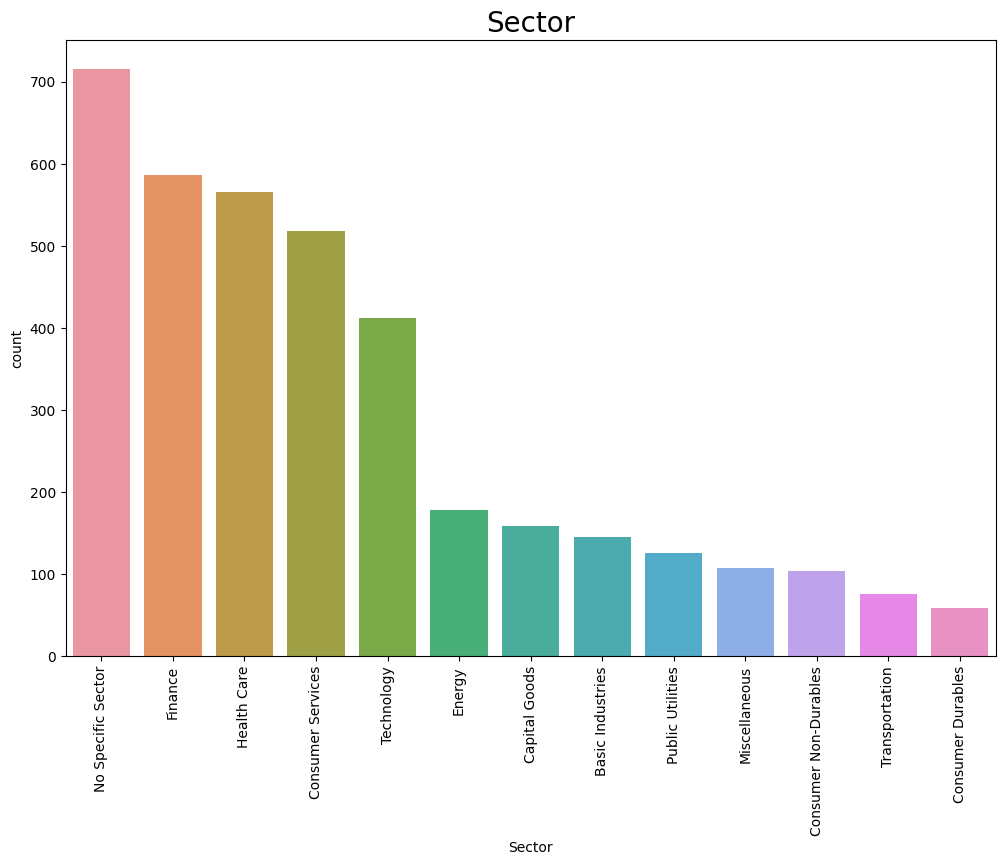

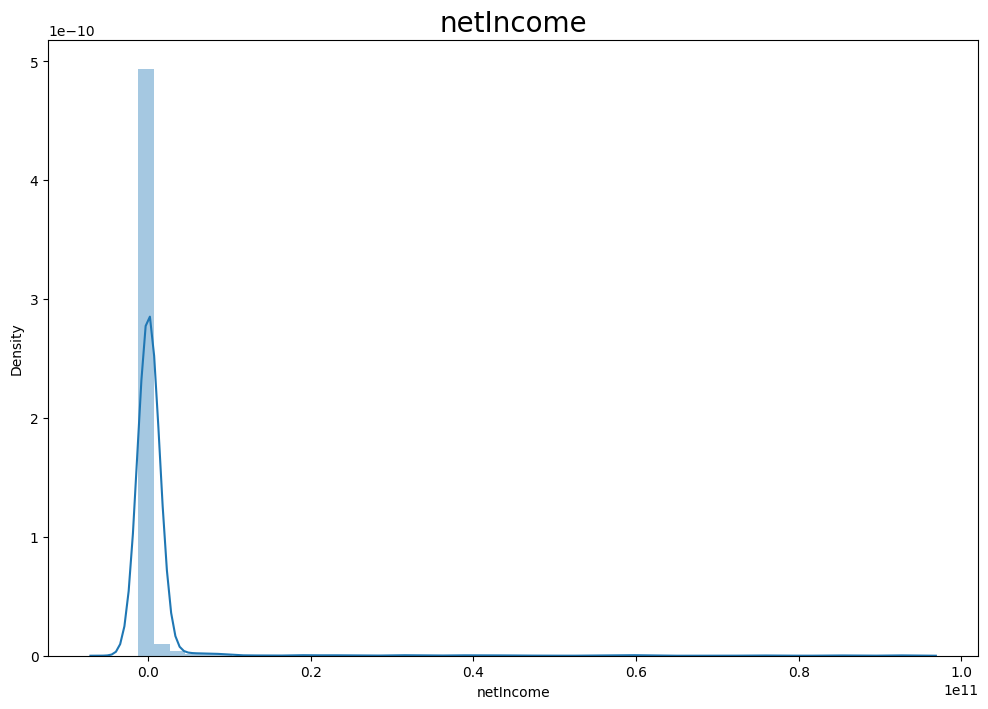

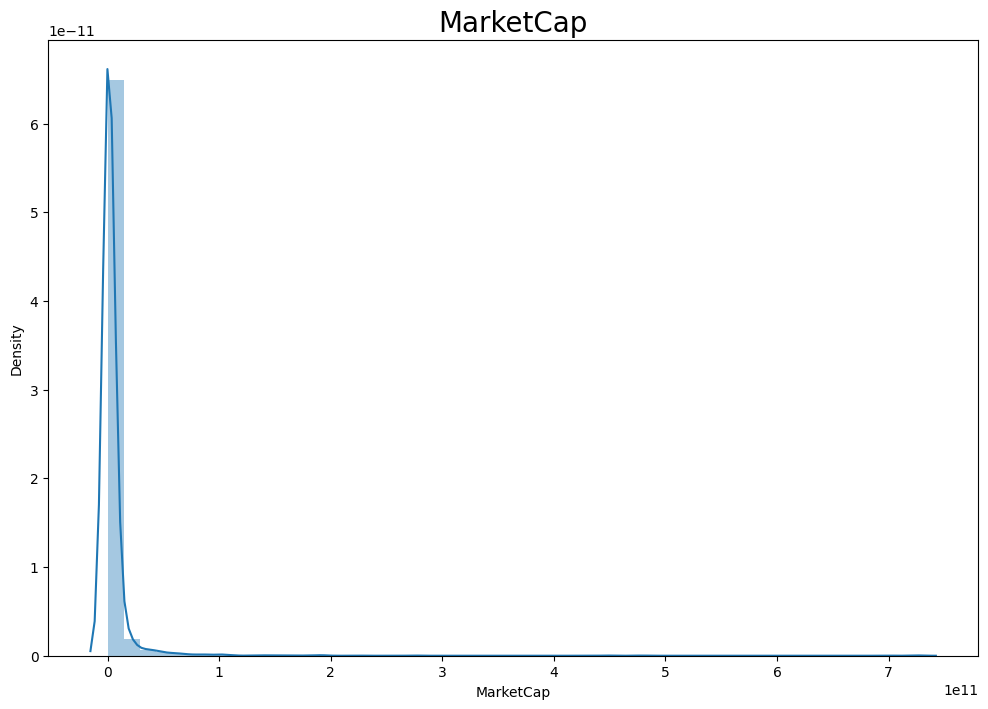

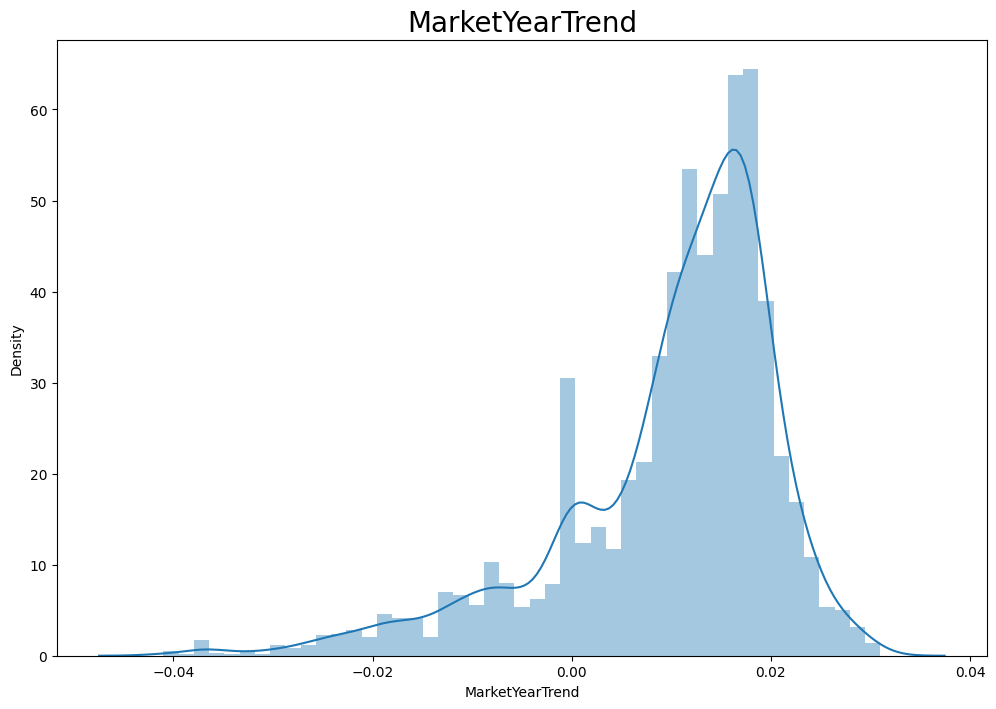

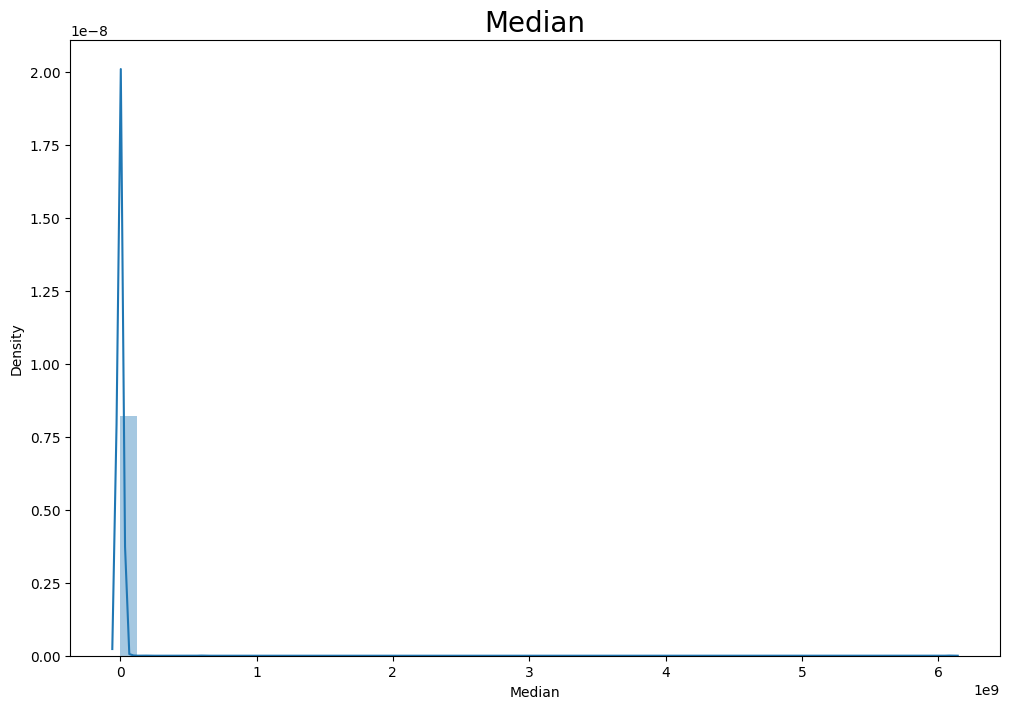

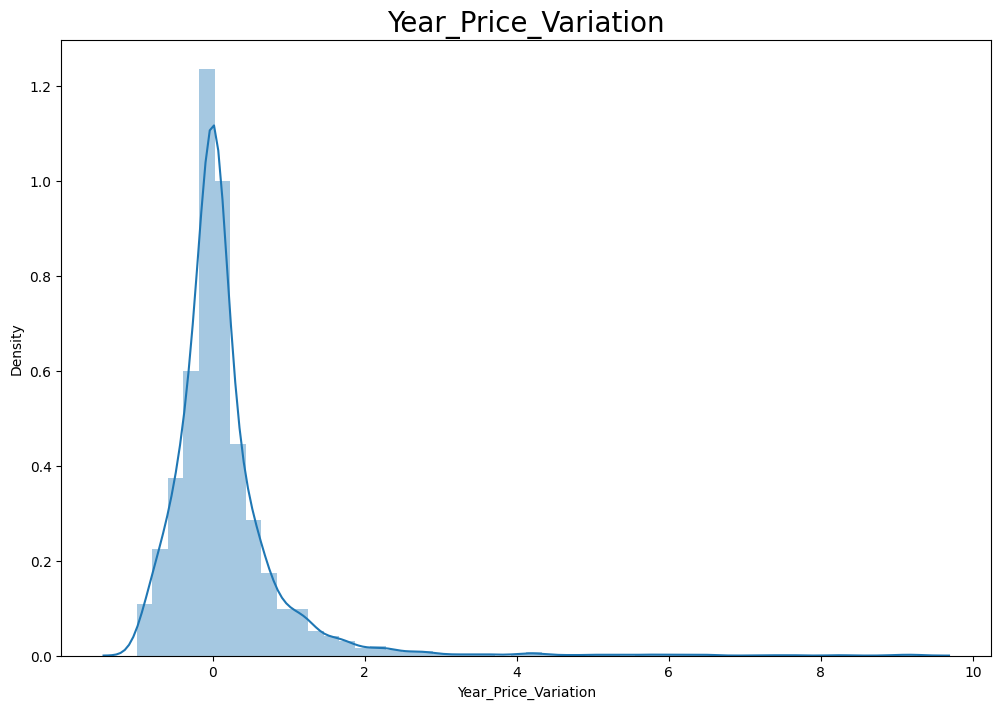

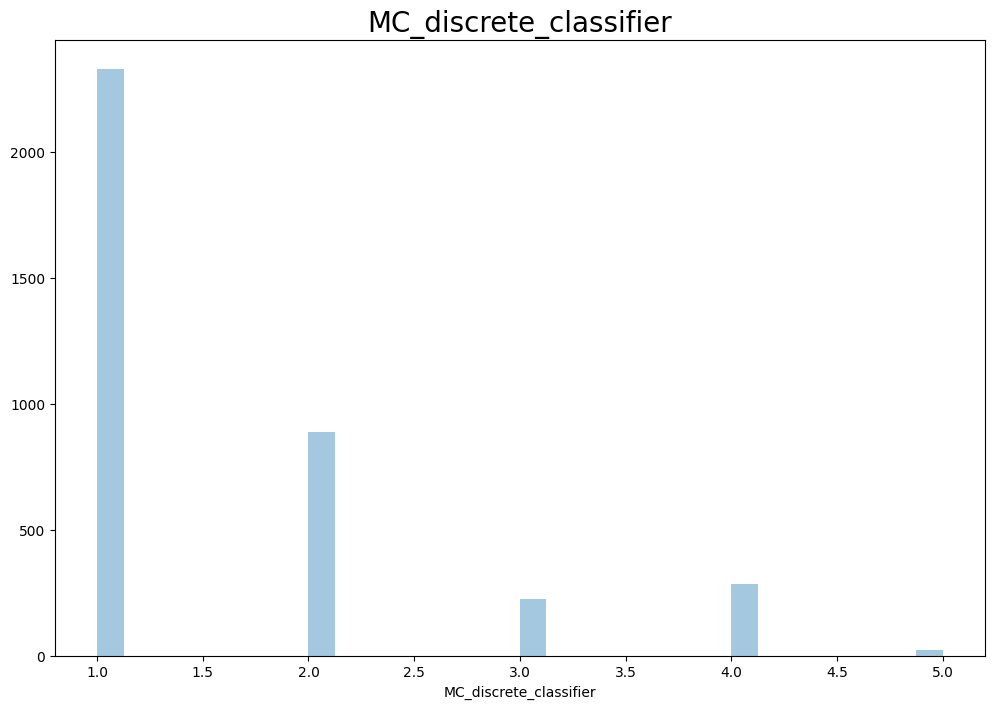

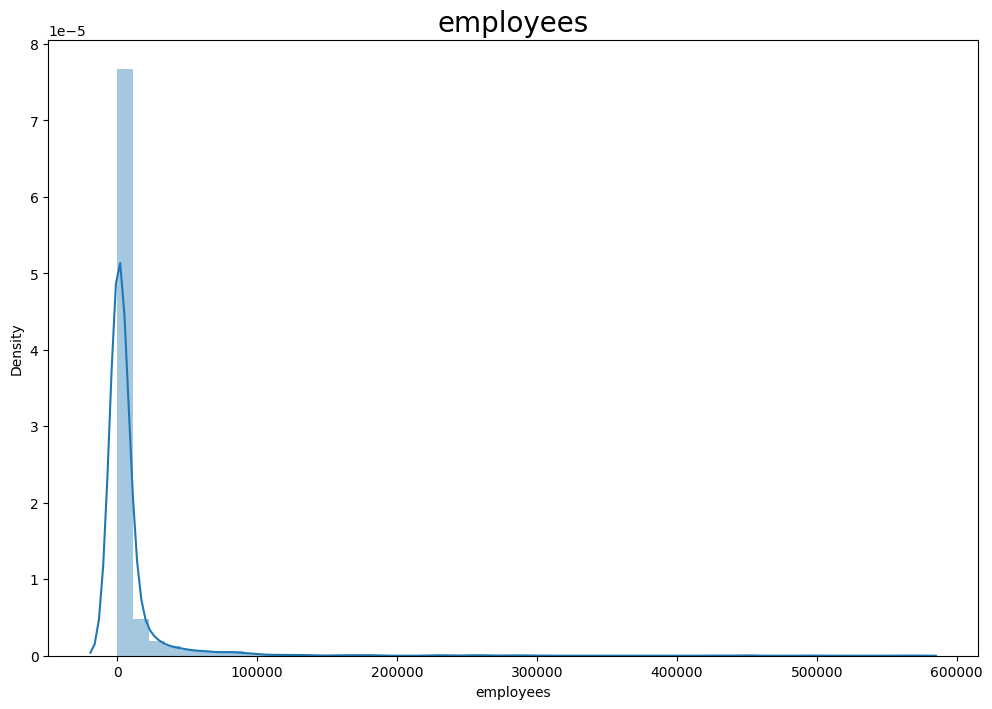

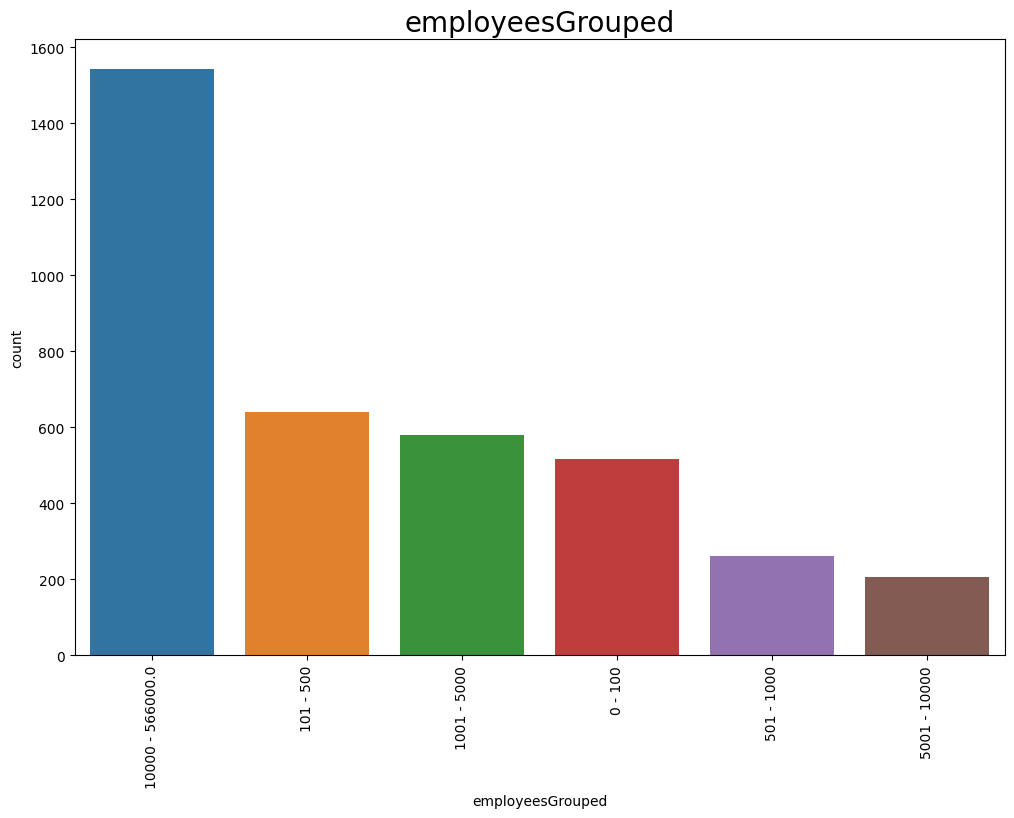

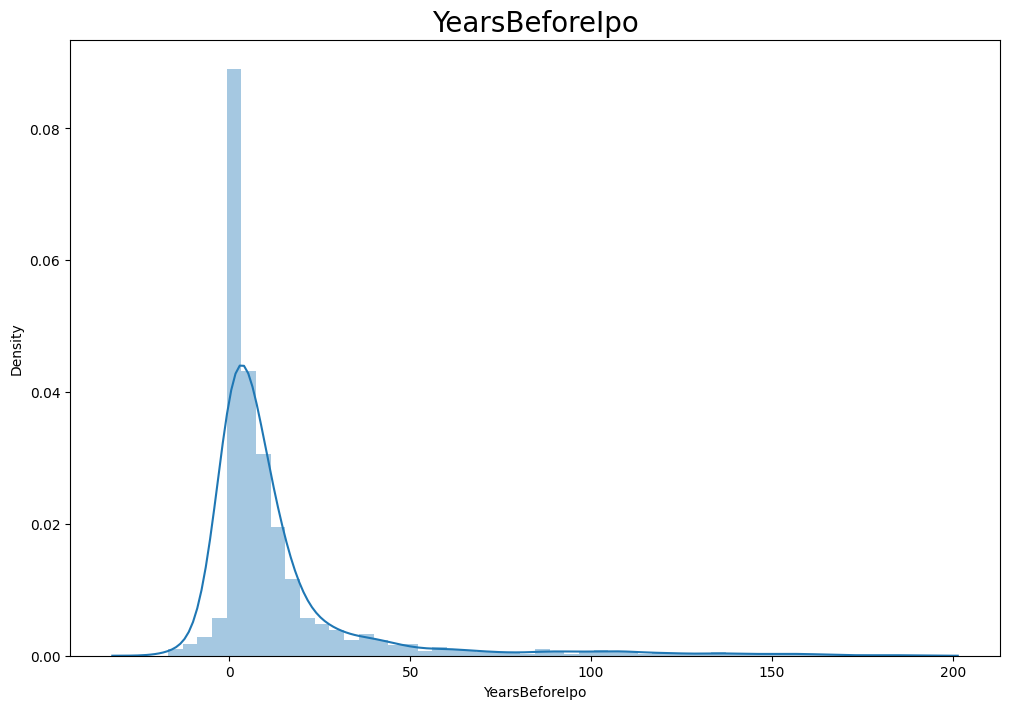

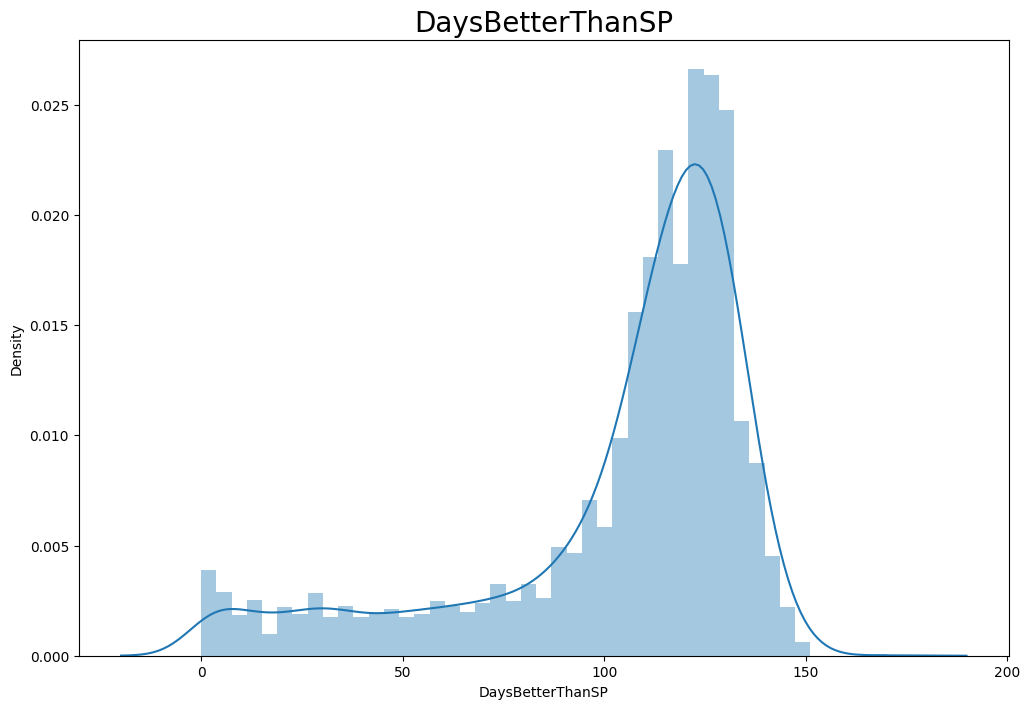

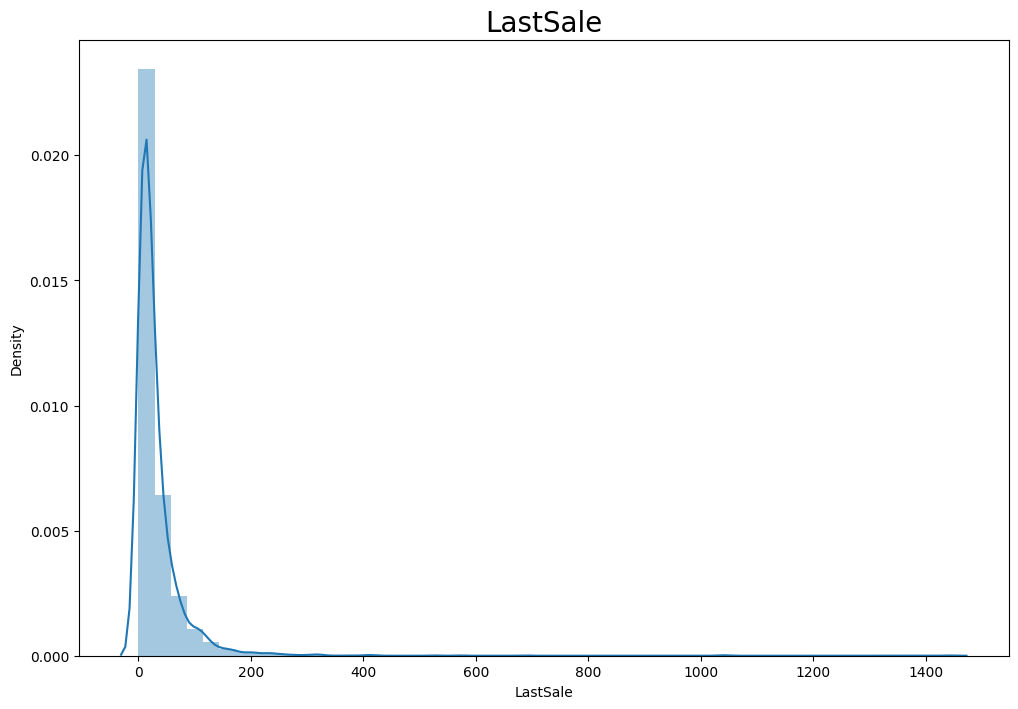

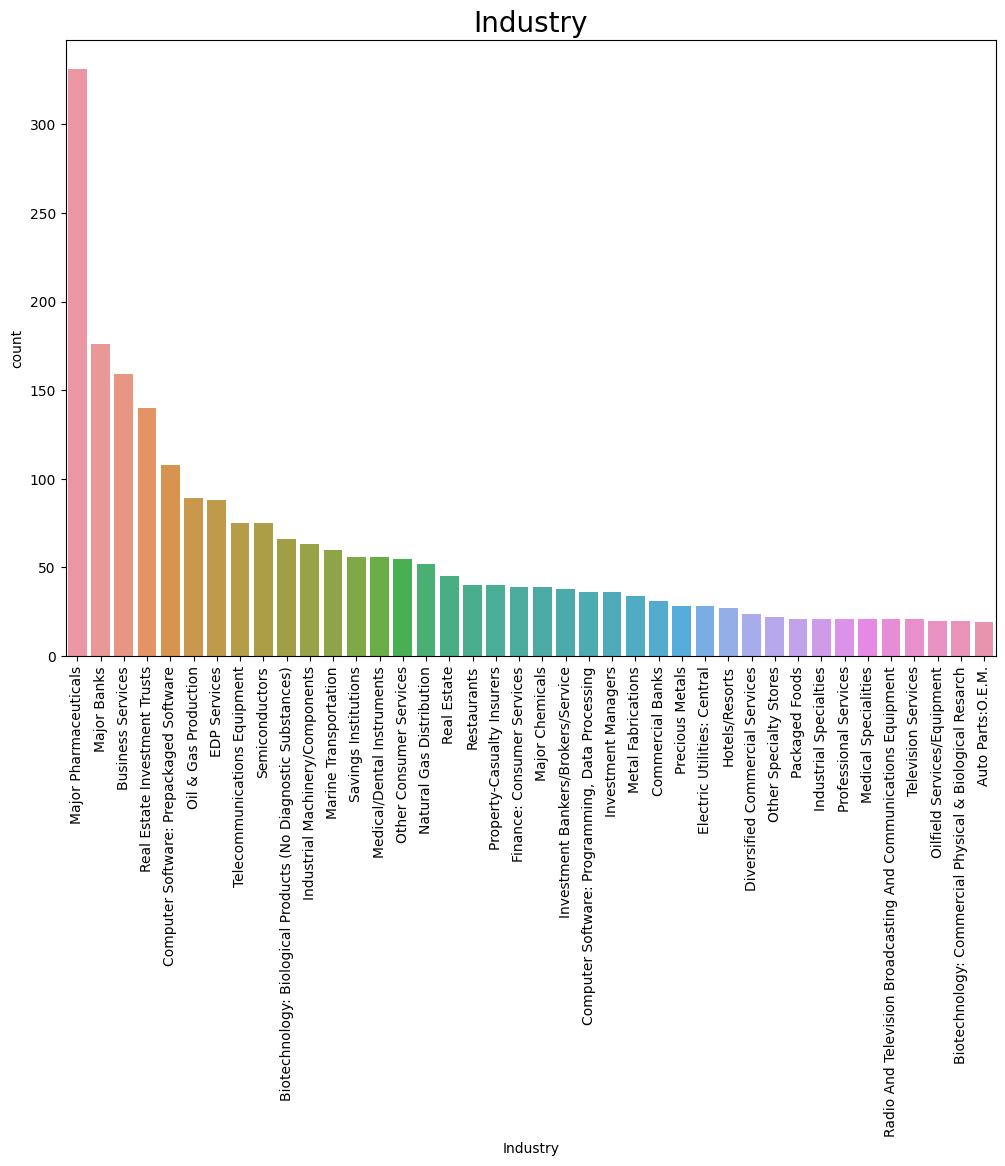

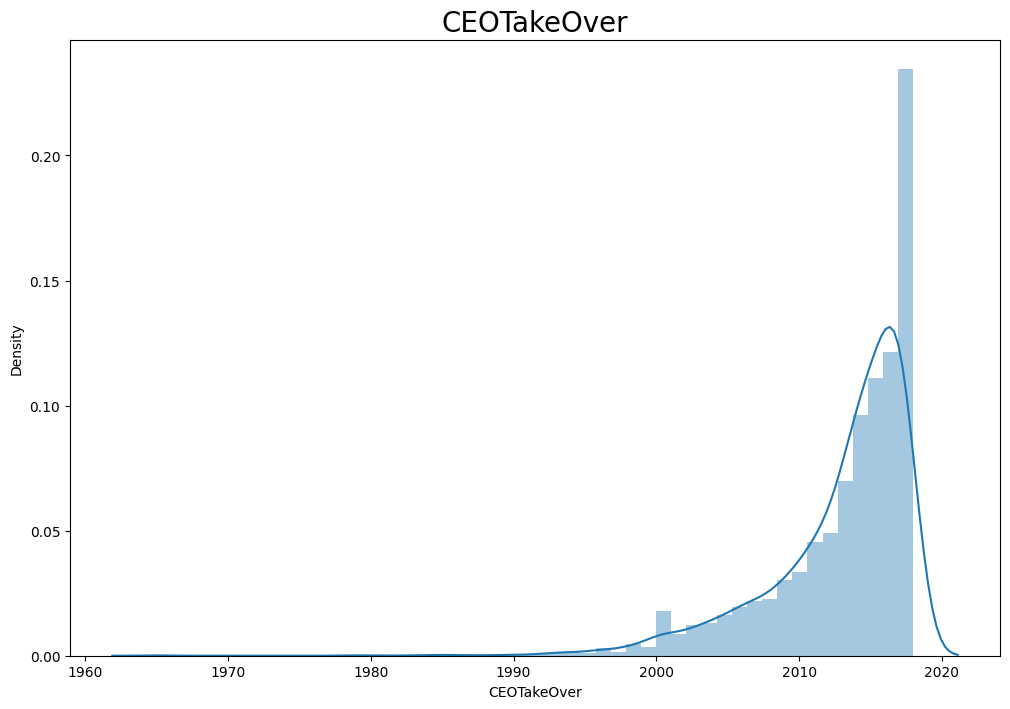

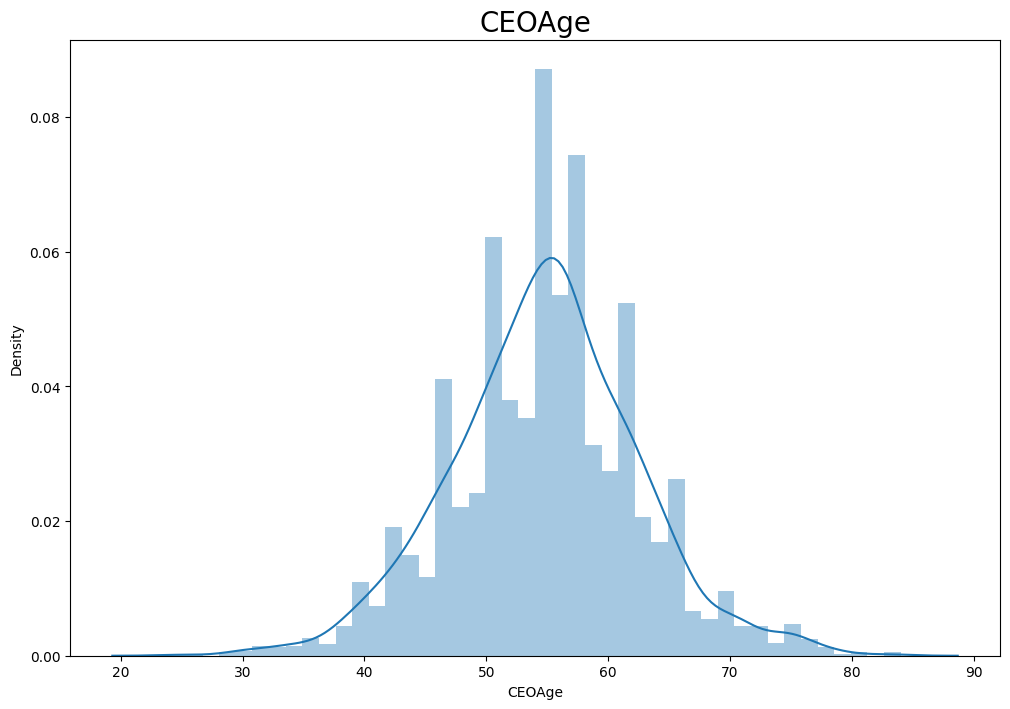

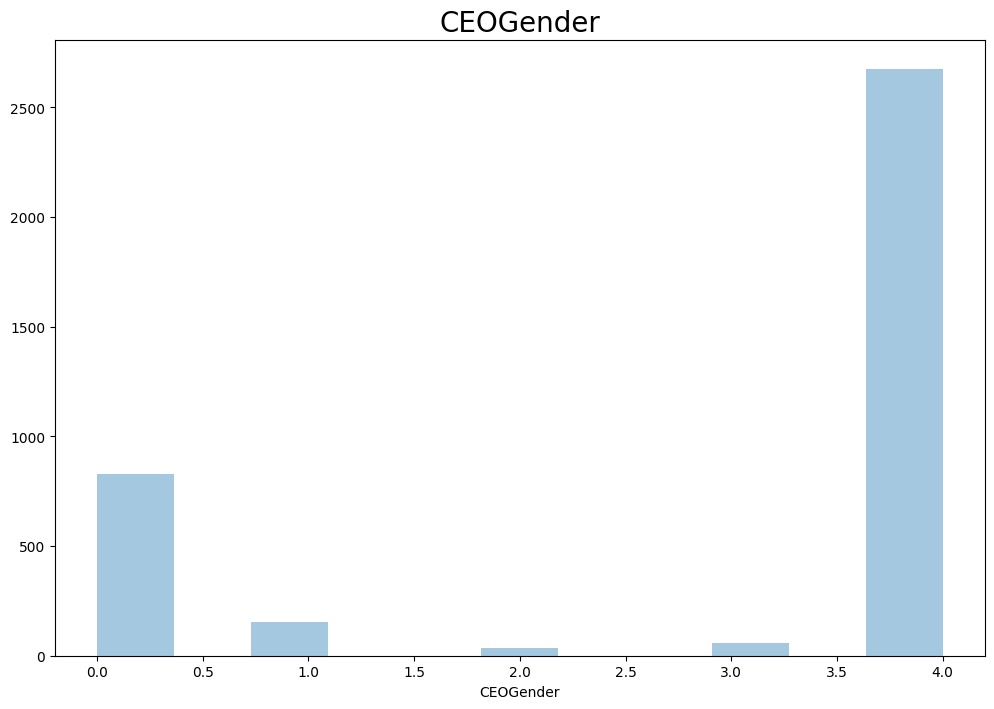

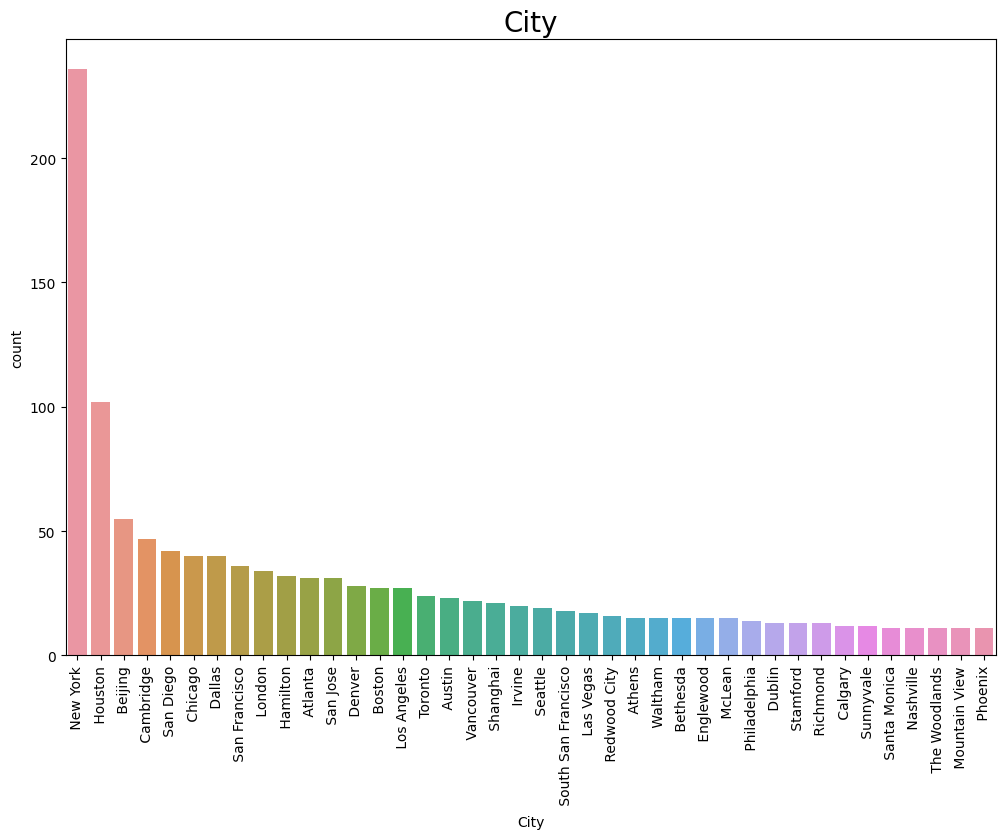

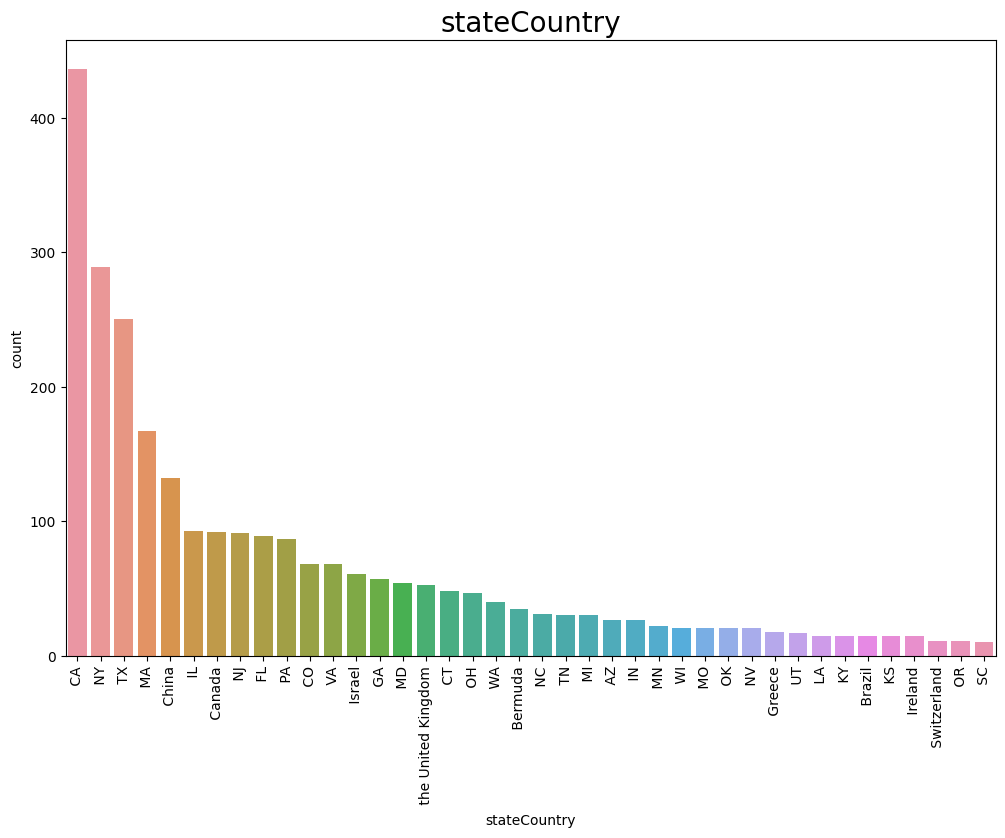

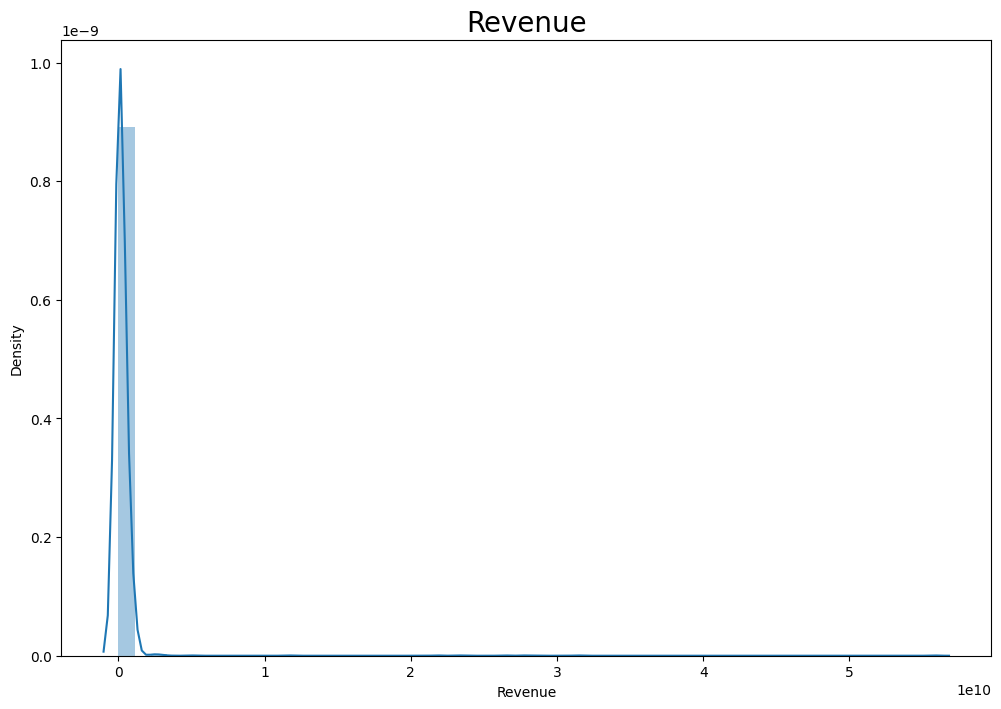

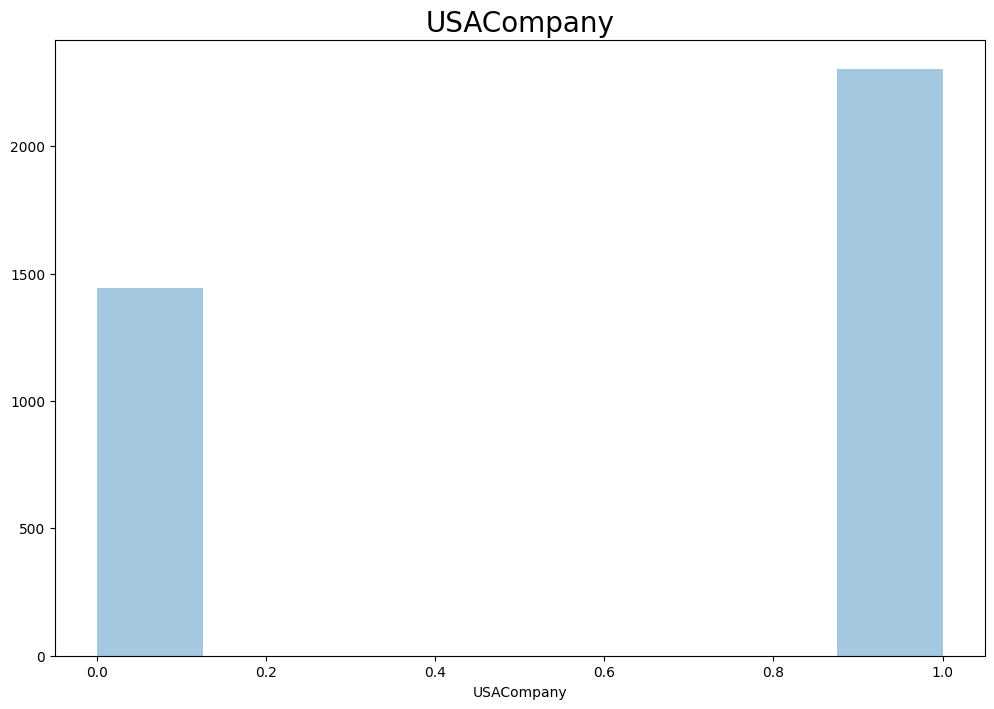

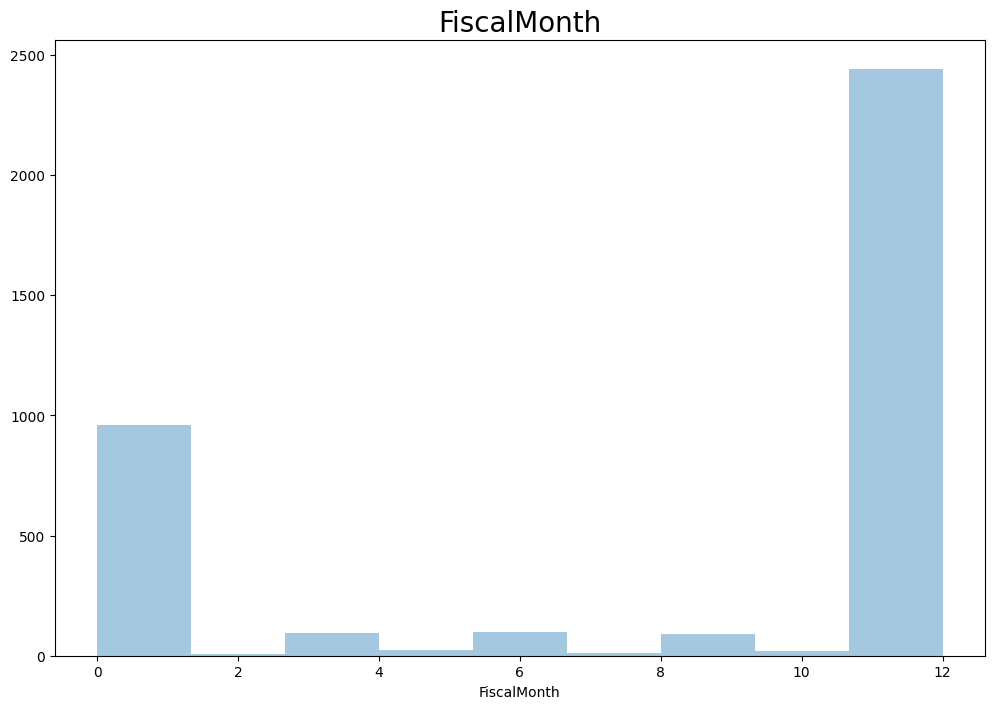

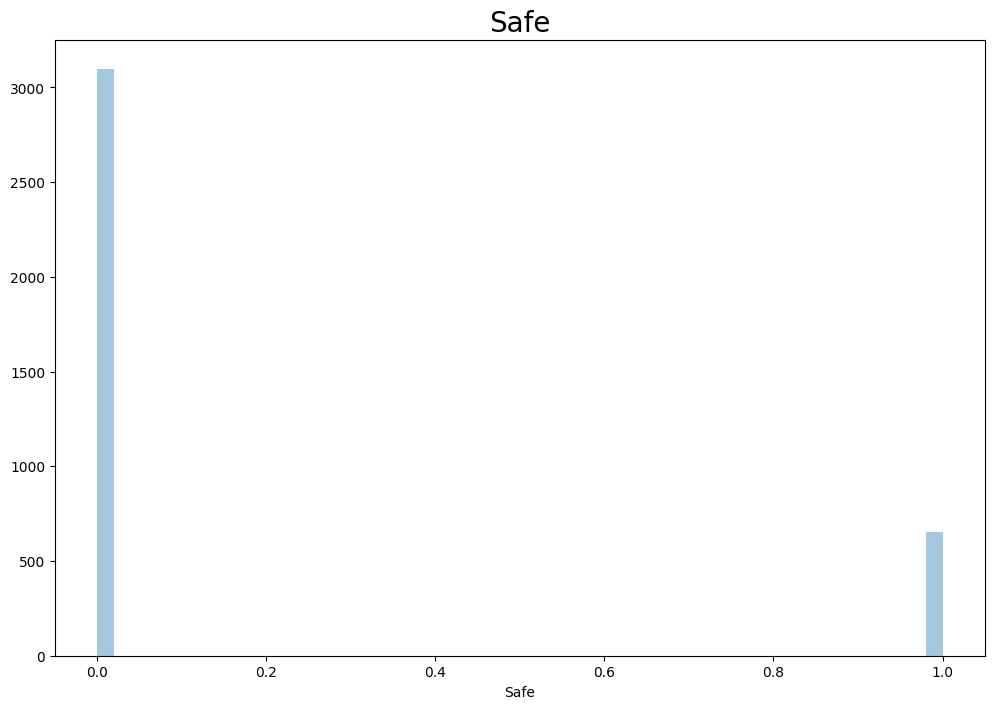

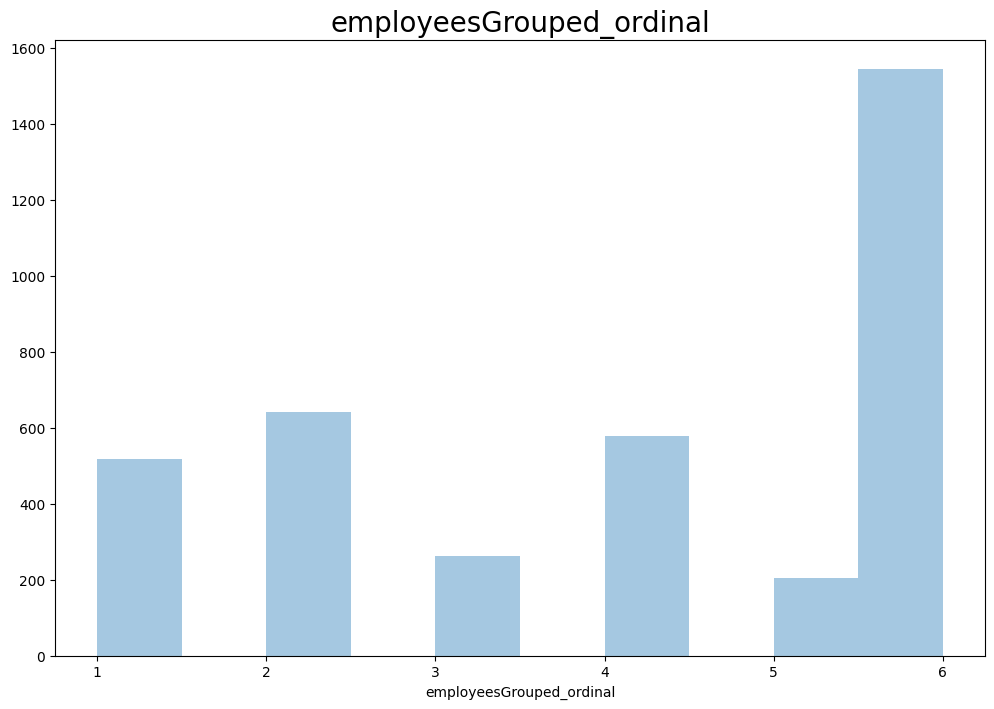

In [37]:
ordered_var = []

for i in df.columns[2:]:
    if i in var_float:
        plt.figure(figsize=(12,8))
        x = sns.distplot(df[f'{i}'])
        plt.title(f'{i}', fontsize=20)
        plt.show(x)
        
    elif i in var_int:
        plt.figure(figsize=(12,8))
        x = sns.distplot(df[f'{i}'], kde=False)
        plt.title(f'{i}', fontsize=20)
        plt.show(x)

    elif i in var_categorical:
        if df[f'{i}'].nunique() > 40:
            n = 40
        else:
            n = df[f'{i}'].nunique()
            
        plt.figure(figsize=(12,8))
        x = sns.countplot(df[f'{i}'].dropna(), order = df[f'{i}'].value_counts().iloc[:n].index)
        plt.title(f'{i}', fontsize=20)
        plt.xticks(rotation=90)
        plt.show(x)

    ordered_var.append(i)



Como se puede ver en las graficas, existen distribuciones continuas que tienen una fuerte concentración de datos con sesgo a la derecha (acumulación al lado izquierdo). Esto es llamativo si se considera que esta data ya fue trabajada y se eliminaron datos más extremos que perjudicaban aún más la visualización de las mediciones. En casos como las variables "employees" o "MarketCap" se optó por crear nuevas variables, esta vez discretas, que agrupen los datos y permitan una mejor visualización.

Variables con mucha concentración de datos en el eje "Y" (sesgo a la derecha):
- netIncome
- MarketCap
- Median
- employees
- LastSale
- Revenue

Variables como "Year_Price_Variation" o "YearsBeforeIpo" también están distribuidas de similar manera pero no en el mismo grado, ya que se logra visualizar la data de forma más clara.

Si se quiere hacer una regresión lineal en el futuro, se debería agrupar las variables continuas de similar manera como se hizo con "employees" y "MarketCap" en "employeesGrouped_ordinal" y "MC_discrete_classifier" respectivamente para buscar linearizar los efectos de dichas variables.

Sector: Los sectores con mayor concentración de compañías son Finance, Health Care, Consumer Services y Technology. A partir del 5to (Energy), la cantidad de empresas se reducen drásticamente. Además, la cantidad de empresas que no pertenece a un sector específico es mayor que el mayor sector (Finance).

MarketYearTrend: el mercado suele subir en torno a 2% anual y parece ser una distribución similar a una normal.

Year_Price_Variation: la moda de crecimiento es entre 0-20% anual, lo cual es razonable. Sin embargo existen outliers que se han multiplicado 100x en un solo año.

employeesGrouped : es curioso como la cantidad de empleados entre 10000 y 566000 es la mayor concentración. Si bien es el intervalo más grande, como sabemos muchas de estas empresas son nuevas y es curioso ver que ya hayan contratado tal cantidad de empleados.
 
 YearsBeforeIpo: la gran mayoria de empresas se funda menos de 5 años antes de su IPO, parece indicar que son creadas con el fin de salir a cotizar a bolsa lo antes posible. Podría indicar un patrón poco saludable ya que para muchos fundadores es un exit strategy más fácil que dirigir la empresa por décadas.
 
 DaysBetterThanSP: la distribución tiene un pico en 125 días sobre 261 y de ahí cae drásticamente hasta un máximo de 150 días mejor que el 
 S&P. Si solo se observa esta métrica, pareciera que comprar un ETF de este índice sería una mejor inversión. Sin embargo, también debe mirarse la subida diaria promedio para mayor profundidad en la evaluación.
 
 LastSale: parece que la mayoría de compañías no prucen una gran cantidad de ventas en el año previo a la IPO. Si se considera la infromación de la edad de las compañías parece tener sentido.

Industry: las dos mayores industrias corresponden muy bien a los sectores más repetidos, siendo estas Major Pharmaceuticals y Major Banks.

CEOAge: interesante como esta es la variable que parece distribuirse de manera más "normal" en torno a los 55 años de edad.

CEOGender: mientras más grande el núumero en la escala de 1-5, más porcentaje de hombres en la directiva. Se ve que claramente en estas empresas hay una cantidad mucho mayor de hombres que de mujeres al mando.

 Revenue: Se repite fuertemente el patrón que en LastSale
 
 USACompany: casi dos tercios de las compañías son americanas, esto sin duda sesga la data y hace más difícil generalizarla a uncontexto global, pero por otro lado, permite ser más confiable este estudio si se quiere usar para compañías americanas.

 FiscalMonth: la mayoría de empresas termina su año fiscal en diciembre pero en el resto de los meses la distribución no es muy regular.

 #ordered_var


In [38]:
df.columns

Index(['Unnamed: 0', 'Symbol', 'Sector', 'netIncome', 'MarketCap',
       'MarketYearTrend', 'Median', 'Year_Price_Variation',
       'MC_discrete_classifier', 'employees', 'employeesGrouped',
       'YearsBeforeIpo', 'DaysBetterThanSP', 'LastSale', 'Industry',
       'CEOTakeOver', 'CEOAge', 'CEOGender', 'City', 'stateCountry', 'Revenue',
       'USACompany', 'FiscalMonth', 'Safe', 'employeesGrouped_ordinal'],
      dtype='object')

## Analisis Bivariado

In [39]:
fig = px.box(df, y="Sector", x="Year_Price_Variation", color="Sector",
             notched=False, # used notched shape
             title="Performance during 'Bullish' and 'Bearish' years (All years)",
            )
fig.show()

Los sectores que parecen ser más consistentes en cuanto a sus medianas de crecimiento anual son "Miscelaneous" y "Energy". Son los únicos sectores en superar el 9% de crecimiento mediano anual. Por el contrario, los que peor lo hacen son "Healthcare" y "Transportation" con tasas de crecimiento negativas de -5% y -2% respectivamente. El resto de sector o está prácticamente en paridad o tienen un crecimiento máximo de 5%. Sin embargo, se ven muchos outliers al alza en "Health Care" lo que parece indicar una gran variabilidad en los datos de ese sector.

In [40]:
import plotly.express as px
fig = px.scatter(df, x="MarketYearTrend", y="Year_Price_Variation", hover_data=['Median'], color="Sector", size='MC_discrete_classifier') 

fig.update_layout(yaxis_tickformat = '0%', xaxis_tickformat = '0%')

fig.show()

Para aclarar lo mostrado por el gráfico, medimos la correlación de las empresas con reciente IPO de cada sector contra la performance de la economía (S&P500). En el gráfico pareciera que la mayoría de empresas salen a cotizar durante un año bueno de bolsa, lo cual tiene sentido ya que la mayoría de años el S&P500 es positivo. Pero no se logra apreciar cómo afecta esto al rendimiento de la acción.

In [41]:
maximus_E = max(df.employees)

In [42]:
bins = pd.IntervalIndex.from_tuples([(0, 1000000000), (1000000000, 5000000000), (5000000000, 10000000000), (10000000000, 100000000000), (100000000000, 1000000000000)], closed='left')
catDf = pd.cut(df["MarketCap"], bins = bins)
maximus_MC = round(max(df.MarketCap)/1000000000)
a = ('0 - 1B', '1B - 5B', '5B - 10B', '10B - 100B', f'100B - {maximus_MC}B')
df['MarketCapClassifier'] = np.array(a)[pd.cut(df["MarketCap"], bins = bins).cat.codes]

In [43]:
fig = px.density_heatmap(df, x="MarketCapClassifier", y="employeesGrouped", marginal_x="histogram", text_auto=True)
fig.update_yaxes(categoryorder='array', categoryarray= ['0 - 100', '101 - 500', '501 - 1000', '1001 - 5000', '5001 - 10000', f'10000 - {maximus_E}'])
fig.update_xaxes(categoryorder='array', categoryarray= ['0 - 1B', '1B - 5B', '5B - 10B', '10B - 100B', f'100B - {maximus_MC}B'])
fig.show()

Como se ve en el gráfico de densidad 2D, 2297 empresas de 3696 (62%) no superan los mil millones (Billion) de capitalización de mercado en su primer año en bolsa. Este grupo además es el que concentra más empresas con el rango menor de empleados (0 a 100) lo cual tiene sentido. Sin embargo, su segundo rango más poblado es el máximo, lo cual es muy curioso. De hecho, este fenómeno ocurre en todas las capitalizaciones de mercado (el rango más  poblado es el de más empleados). Haciendo ver que no hay una relación tan clara entre tamaño o Market Cap y número de empleados. Sin embargo, sí podemos ver conforme nos movemos a la derecha del cuadro que tiende a haber una mayor proporción de empresas en la parte superior de la tabla que en la inferior, es decir, a más grande es la empresa, suele contratar más empleados.

In [44]:
unique_sectors = df['Sector'].unique()
for i in unique_sectors:     
    df_sector = df[df['Sector'] == i]
    print(i)
    fig = px.density_heatmap(df_sector, x="MarketCapClassifier", y="employeesGrouped", marginal_x="histogram", text_auto=True)
    fig.update_yaxes(categoryorder='array', categoryarray= ['0 - 100', '101 - 500', '501 - 1000', '1001 - 5000', '5001 - 10000', f'10000 - {maximus_E}'])
    fig.update_xaxes(categoryorder='array', categoryarray= ['0 - 1B', '1B - 5B', '5B - 10B', '10B - 100B', f'100B - {maximus_MC}B'])
    fig.show()


Capital Goods


Health Care


Technology


Consumer Services


Energy


Transportation


No Specific Sector


Consumer Non-Durables


Consumer Durables


Finance


Basic Industries


Miscellaneous


Public Utilities


Las empresas de todos los sectores suelen seguir la tendencia general de mayor escala igual a mayor número de empleados. Sin embargo, los gráficos muestras que efectivamente sectores como la tecnología y curionasmente el la Energía, no la siguen tan de cerca. Este hallazgo es interesante porque revaloriza escalar sin mayor inversión adicional en mano de obra. Considerando que es de los mayores costos de muchas empresas, significa que al crecer, compañías de estos sectores rápidamente expanden sus márgenes.